#                   A FLU-SHOT MACHINE LEARNING PROJECT

###   BUSINESS UNDERSTANDING

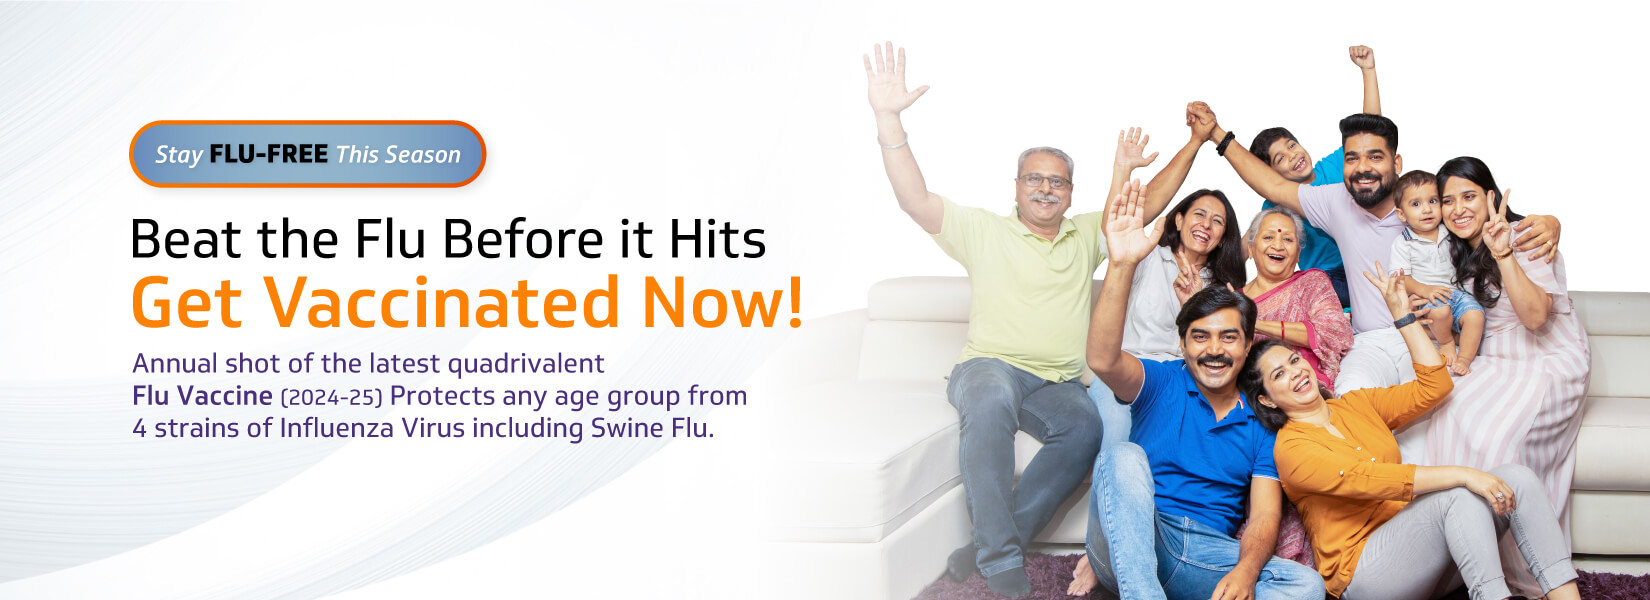


**OVERVIEW**

Vaccines play a very crucial role in disease prevention, they work by providing immunity to individuals as well communities to prevent specific communicable diseases like COVID-19, swine flu, influenza and Tuberculosis. The first vaccine was developed in 1796, by an English physician Edward Jenner and was used to vaccinate the first human against smallpox. Today’s vaccines have evolved and become more complex, robust and more efficient these is due to the continuous growth of technology and research in the health industry. Hence measures have been put in place to ascertain quality, efficiency and distribution of the vaccines. The H1N1 VACCINE was developed in 2009 and approved for use in 2010  after the swine flu pandemic broke out in 2009 killing more than two million people worldwide while the seasonal vaccine also known as the 'flu-shot' is commonly used to prevent flu (influenza) during the flu season.

The Center for Disease Control and Prevention (CDC) wants to understand how different individual personal characteristics influence the uptake of the H1N1 and seasonal vaccine as well as the vaccine patterns which would provide guidance for future public health efforts.

**CHALLENGES**

Lack of adequate data driven decisions in provision of H1N1 and seasonal vaccines to the population

**PROPOSED SOLUTION**

A machine learning model which will predict the uptake of the H1N1 and seasonal vaccines based on their own personal characteristics with "Area under the ROC Curve of 80%

**BRIEF CONCLUSION**

Vaccines are crucial for disease prevention, protecting individuals and communities against diseases like COVID-19 and tuberculosis. The CDC is exploring how personal traits affect vaccine uptake, proposing a machine learning model with 80% ROC curve accuracy to predict H1N1 and seasonal flu vaccine uptake based on individual characteristics.

**PROBLEM STATEMENT** 

Vaccines are critical for preventing communicable diseases such as COVID-19, swine flu, seasonal influenza, and tuberculosis. However, making data-driven decisions about vaccine distribution and delivery remains difficult. The CDC seeks to understand how individual features influence uptake of the vaccines so as to provide guidance for future public health efforts

**OBJECTIVES** 

**Main Objectives**

To predict how likely people are to get the H1N1 and seasonal flu vaccines.


**Specific Objectives**

.To determine the distribution of the uptake of the H1N1 and seasonal vaccines

.To determine the correlation between the uptake of both vaccines

.To determine which characteristics are likely to influence one to taking a particular vaccine




### DATA UNDERSTANDING

**DATA SOURCE**

Data was downloaded from https://www.drivendata.org/competitions/66/flu-shot-learning/data/ which a phone survey was done in 2009 courtesy of the United states National Center for Health Statistics

**DATA DESCRIPTION**


**Features**

These data set contained  features to be used for predicting our target variables

These features are sourced from respondents reply during the phone survey

**Labels**

These data set contain our target variables H1N1 and seasonal vaccine take encoded in binary form [0,1]


Let’s load them

In [8]:
#importing  necessary modules

# Data Manipulation
import pandas as pd 
import numpy as np 

# Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modelling 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [9]:
#loading the data sets
feature_df = pd.read_csv(r'C:\Users\user\Documents\new\Flu-Shot-Learning-project\training_set_features.csv')
label_df = pd.read_csv(r'C:\Users\user\Documents\new\Flu-Shot-Learning-project\training_set_labels.csv')
print(feature_df)
print(label_df)

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance

In [10]:
#lets merge the two data sets because they share a similar column respondent id using a left joint
vaccine_df = feature_df.merge(label_df, how='left', on='respondent_id')

In [11]:
#lets create a DataUnderstanding class and intialize it which will help us understand our merged dataset 

# Define the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, data):
        self.data = data

    def data_info(self):
        print(f"Shape: {self.data.shape}")
        print(f"Dataframe info:{self.data.info()}")
        print(f"Descriptive Statistics:\n{self.data.describe()}")      
        print(f"Columns:\n{self.data.columns.tolist()}")
        print(f"Data Types for each column:\n{self.data.dtypes}")
        print(f"The first {n} rows:\n{self.data.head(n)}")
      


data_summary = DataUnderstanding(vaccine_df)

# Calling all the methods to see the outputs
data_summary.data_info()


Shape: (26707, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 1

NameError: name 'n' is not defined

**COLUMN DISTRIBUTION**

We have 38 rows lets try to understand what they mean courtesy of(**https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/**)
 
.**respondent_id** - is a unique and random identifier

.**h1n1_concern** - Level of concern about the H1N1 flu.
   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

.**h1n1_knowledge** - Level of knowledge about H1N1 flu.
   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

.**behavioral_antiviral_meds** - Has taken antiviral medications. (binary)

.**behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)

.**behavioral_face_mask** - Has bought a face mask. (binary)

.**behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)

.**behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)

.**behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)

.**behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)

.**doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)

.**doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)

.**chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes,    a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a        liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness.          (binary)
 
.**child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)

.**health_worker** - Is a healthcare worker. (binary)

.**health_insurance** - Has health insurance. (binary)

.**opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

.**opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

.**opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

.**opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

.**opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

**opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
  1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

.**age_group** - Age group of respondent.

.**education** - Self-reported education level.

.**race** - Race of respondent.

.**sex** - Sex of respondent.

.**income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.

.**marital_status** - Marital status of respondent.

.**rent_or_own** - Housing situation of respondent.

.**employment_status** - Employment status of respondent.

.**hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health      and Human Services. Values are represented as short random character strings.

.**census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

.**household_adults** - Number of other adults in household, top-coded to 3.

.**household_children** - Number of children in household, top-coded to 3.

.**employment_industry** - Type of industry respondent is employed in. Values are represented as short random character            strings.

.**employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.

**Target variables**

.h1n1_vaccine

.seasonal_vaccine

These dataset is relevant to our project

### DATA CLEANING

At these stage we will clean our data using the following steps

. **Completeness** (we will check for missing values , how they affect our data set and how we will handle them)

. **Consistency** (we will check for duplicate values and how to handle them)

. **Uniformity** (we will check for uniformity in column data types)

. **Validity** (we will handlle irrelevant columns and check for outliers )

 #### Completeness

In [12]:
#Lets create a class to help us clean our data 
class DataCleaning:
    def __init__(self, vaccine_df):
        self.vaccine_df = vaccine_df

    def unclean_data_summary(self):
        missing_values = self.vaccine_df.isnull().sum()
        duplicate_values = self.vaccine_df.duplicated().sum()
        missing_percentage = (self.vaccine_df.isnull().mean() * 100)
        unclean_summary = pd.DataFrame({
            'Missing Values': missing_values,
            'Percentage Missing': missing_percentage,
            'Duplicate Values': duplicate_values,
            # 'Percentage Duplicate': duplicate_percentage  # Assuming this is not defined
        })
        print(f"Unclean values summary per column:\n{unclean_summary}")
        return unclean_summary

unclean_summary = DataCleaning(vaccine_df)
unclean_summary.unclean_data_summary()

Unclean values summary per column:
                             Missing Values  Percentage Missing  \
respondent_id                             0            0.000000   
h1n1_concern                             92            0.344479   
h1n1_knowledge                          116            0.434343   
behavioral_antiviral_meds                71            0.265848   
behavioral_avoidance                    208            0.778822   
behavioral_face_mask                     19            0.071142   
behavioral_wash_hands                    42            0.157262   
behavioral_large_gatherings              87            0.325757   
behavioral_outside_home                  82            0.307036   
behavioral_touch_face                   128            0.479275   
doctor_recc_h1n1                       2160            8.087767   
doctor_recc_seasonal                   2160            8.087767   
chronic_med_condition                   971            3.635751   
child_under_6_months       

,Missing Values,Percentage Missing,Duplicate Values
respondent_id,0,0.000000,0
h1n1_concern,92,0.344479,0
h1n1_knowledge,116,0.434343,0
behavioral_antiviral_meds,71,0.265848,0
behavioral_avoidance,208,0.778822,0
behavioral_face_mask,19,0.071142,0
behavioral_wash_hands,42,0.157262,0
behavioral_large_gatherings,87,0.325757,0
behavioral_outside_home,82,0.307036,0
behavioral_touch_face,128,0.479275,0


There are columns with missing values with some columns such as  **health_insurance, employment_industry and employment_occupation** having more than 40% missing values. Let’s investigate further as we find means of handling them these is because we are working with a very sensitive dataset in the health industry

First, we have to drop the columns with the largest percentage of missing values because they will greatly affect our model performances, reliability as well as quality of our data if we drop the null values or try to fill them we will drop the three columns with more than 40% of missing values because these represents almost half of the values


In [13]:
#dropping columns with more than 40% null values 
vaccine_df.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace = True)

Most of the null values are due to reluctance of respondents to share information which can be crucial for modeling, therefore we will fill the null values with the mode for categorical variables and median for all numerical variables .The reason behind these is that the mode and median represent majority of the responses to each survey questions and dropping the null values could significantly affect our quality of our data for modelling

In [14]:
#filling all the remaining null alues with our mode for both numerical and categorical variables using a for loop
for i in vaccine_df.columns:
    if vaccine_df[i].isnull().sum() and vaccine_df[i].dtypes != 'object':
        vaccine_df[i].loc[(vaccine_df[i].isnull())] = vaccine_df[i].median()
for i in vaccine_df.columns:
    if vaccine_df[i].isnull().sum() and vaccine_df[i].dtypes == 'object':
        vaccine_df[i].loc[(vaccine_df[i].isnull())] = vaccine_df[i].mode().max()

C:\Users\user\AppData\Local\Temp\ipykernel_13940\269860166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_df[i].loc[(vaccine_df[i].isnull())] = vaccine_df[i].median()
C:\Users\user\AppData\Local\Temp\ipykernel_13940\269860166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_df[i].loc[(vaccine_df[i].isnull())] = vaccine_df[i].median()
C:\Users\user\AppData\Local\Temp\ipykernel_13940\269860166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [15]:
#checking to see our changes
vaccine_df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

Our dataset now does not have any null values lets proceed to the next process 

#### Consistency

We don't have any duplicate values

#### Uniformity

We will change the float columns dtypes into integer this is because we need consistency in our data types ensuring that all numerical features are consistently typed hence simplifying the data processing for modelling


In [16]:
# Converting all float columns to integers using a for loop
for i in vaccine_df.columns:
    if vaccine_df[i].dtype == 'float64':
        vaccine_df[i] = vaccine_df[i].astype('int64')
        
#lets confirm our changes
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                26707 non-null  int64 
 1   h1n1_concern                 26707 non-null  int64 
 2   h1n1_knowledge               26707 non-null  int64 
 3   behavioral_antiviral_meds    26707 non-null  int64 
 4   behavioral_avoidance         26707 non-null  int64 
 5   behavioral_face_mask         26707 non-null  int64 
 6   behavioral_wash_hands        26707 non-null  int64 
 7   behavioral_large_gatherings  26707 non-null  int64 
 8   behavioral_outside_home      26707 non-null  int64 
 9   behavioral_touch_face        26707 non-null  int64 
 10  doctor_recc_h1n1             26707 non-null  int64 
 11  doctor_recc_seasonal         26707 non-null  int64 
 12  chronic_med_condition        26707 non-null  int64 
 13  child_under_6_months         26

#### Validity

In [17]:
#checking for outliers using intequatrile method for each numeric column
Q1 = vaccine_df.quantile(0.25, numeric_only=True)
Q3 = vaccine_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

respondent_id                  13353.0
h1n1_concern                       1.0
h1n1_knowledge                     1.0
behavioral_antiviral_meds          0.0
behavioral_avoidance               1.0
behavioral_face_mask               0.0
behavioral_wash_hands              0.0
behavioral_large_gatherings        1.0
behavioral_outside_home            1.0
behavioral_touch_face              1.0
doctor_recc_h1n1                   0.0
doctor_recc_seasonal               1.0
chronic_med_condition              1.0
child_under_6_months               0.0
health_worker                      0.0
opinion_h1n1_vacc_effective        2.0
opinion_h1n1_risk                  3.0
opinion_h1n1_sick_from_vacc        3.0
opinion_seas_vacc_effective        1.0
opinion_seas_risk                  2.0
opinion_seas_sick_from_vacc        1.0
household_adults                   1.0
household_children                 1.0
h1n1_vaccine                       0.0
seasonal_vaccine                   1.0
dtype: float64


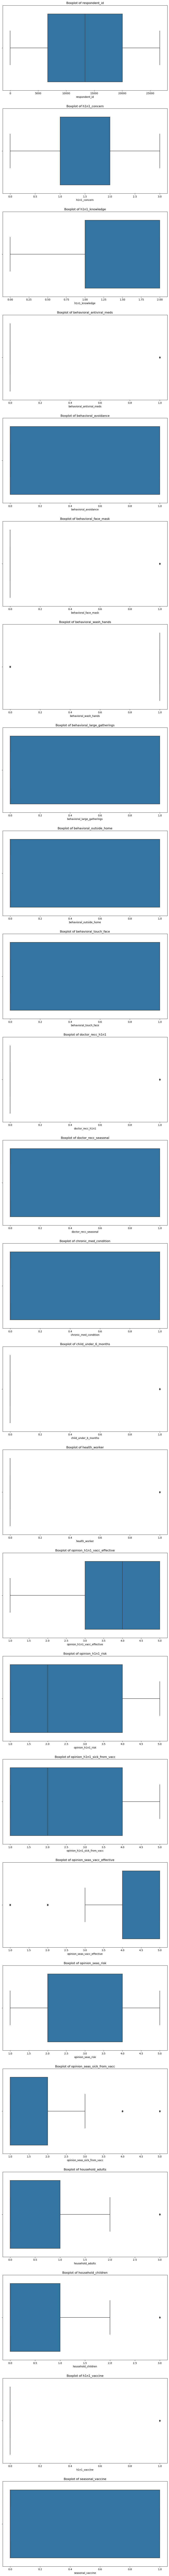

In [18]:
# Plotting box plots to visualize our outlier
numeric_columns = vaccine_df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 6 * len(numeric_columns)))
for i, column in enumerate(numeric_columns):
    ax = axes[i] if len(numeric_columns) > 1 else axes  
    sns.boxplot(x=vaccine_df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    

plt.tight_layout(pad=3.0) 
plt.subplots_adjust(top=0.95)

After visualizing we did find any outliers hence our data has no outliers  these is because our data includes response which were categorized into various class

In [19]:
#Lets store our cleaned data in a new ariable clean_vac_df
clean_vac_df = vaccine_df

We are now our comfortable our data is clean lets begin  our  data analysis to obtain more insights from our data

### DATA ANALYSIS

#### Univarent analysis

Lets start by analysising the  number of people who took each of the vaccine

In [20]:
#Creating a data analysis class
class DataAnalysis:
    def __init__(self, clean_vac_df):
        self.clean_vac_df = clean_vac_df

    def visualize(self, x_col, y1_col, y2_col):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.barplot(x=self.clean_vac_df[x_col], y=self.clean_vac_df[y1_col] * 100)
        plt.title(f"{y1_col} by {x_col}")
        plt.xlabel(x_col)
        plt.ylabel('Percentage')

        plt.subplot(1, 2, 2)
        sns.barplot(x=self.clean_vac_df[x_col], y=self.clean_vac_df[y2_col] * 100)
        plt.title(f"{y2_col} by {x_col}")
        plt.xlabel(x_col)
        plt.ylabel('Percentage')

        plt.tight_layout()
        plt.show()

data_visualization = DataAnalysis(clean_vac_df)


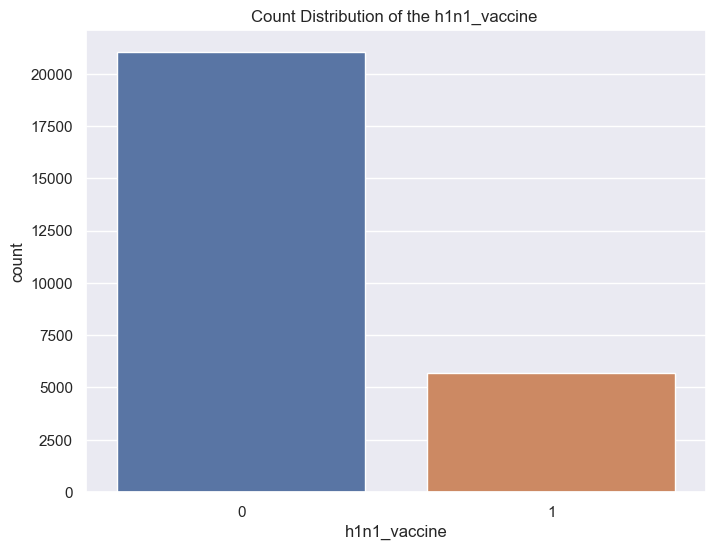

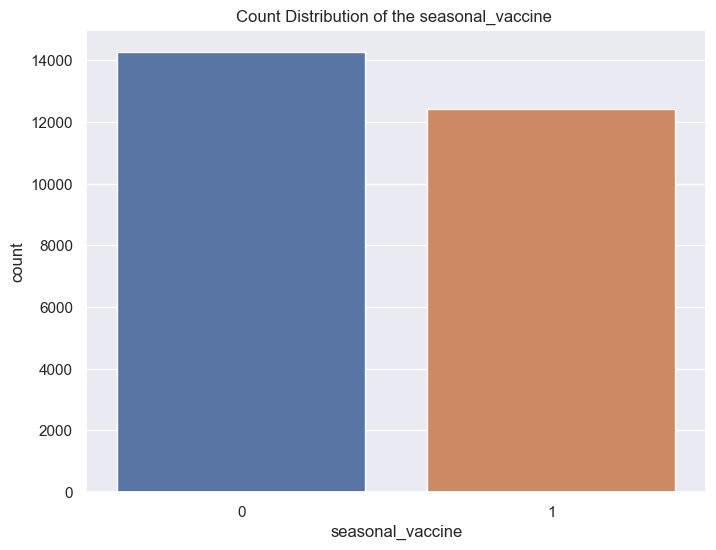

In [21]:
#lets plot count plots for these
sns.set(rc={'figure.figsize':(8, 6)}) 
ax=sns.countplot(x='h1n1_vaccine',data=clean_vac_df)
ax.set_title('Count Distribution of the h1n1_vaccine ');
plt.show()
ax=sns.countplot(x='seasonal_vaccine',data=clean_vac_df)
ax.set_title('Count Distribution of the seasonal_vaccine ');
plt.show()


**Observation** many people opt to take the seasonal vaccine compared to the H1N1 vaccine and also there seems to be a class imbalance in the H1N1 class which we will correct later on

#### Bivarent analysis

Comparing categorical variables with our target variables 

**Gender distribution according to uptake of vaccines**

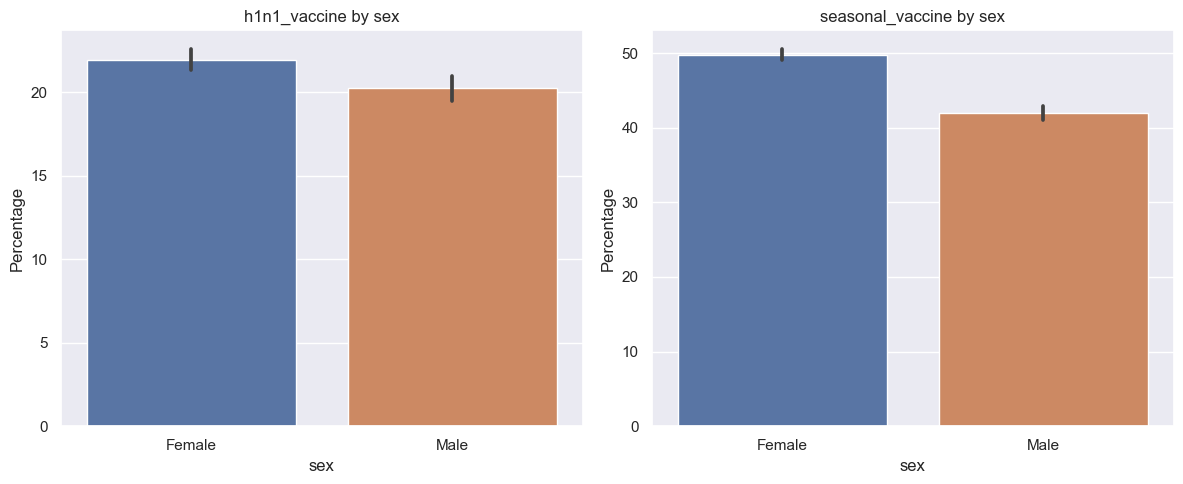

In [22]:
#lets plot a bar graph
data_visualization.visualize('sex', 'h1n1_vaccine', 'seasonal_vaccine')

**Observation** Seems most of the people who are taking vaccines are of the female gender, these could be a area to research on as to why men are not getting vaccinated

**Comparing our target variables with different age groups**

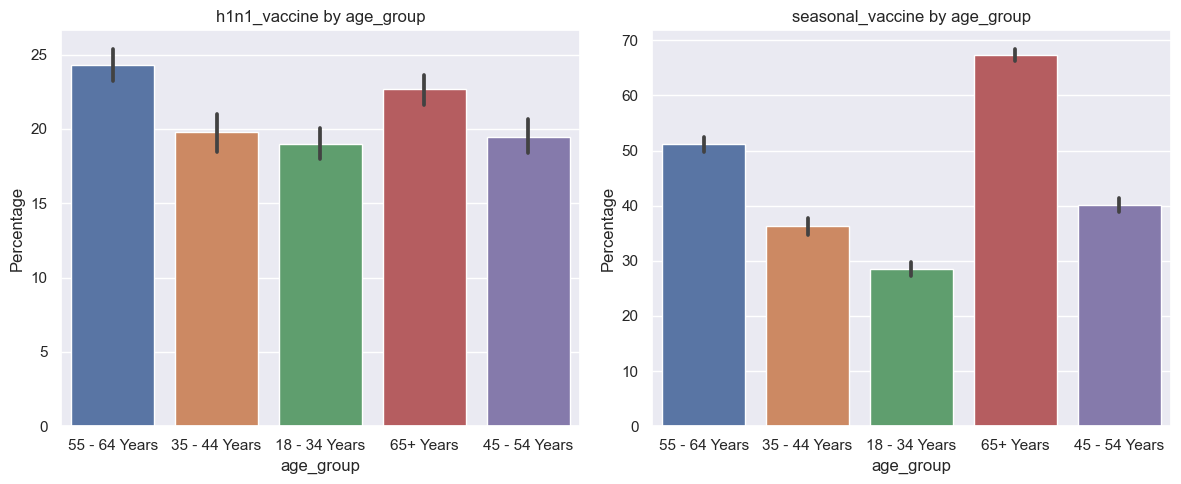

In [23]:
data_visualization.visualize('age_group', 'h1n1_vaccine', 'seasonal_vaccine')


**Observations**The elder generation from ages between 55- 65 and above seem to be the majority of persons taking the vaccines these could be due to the lowering immunity due to age

**Compare education level to vaccines**

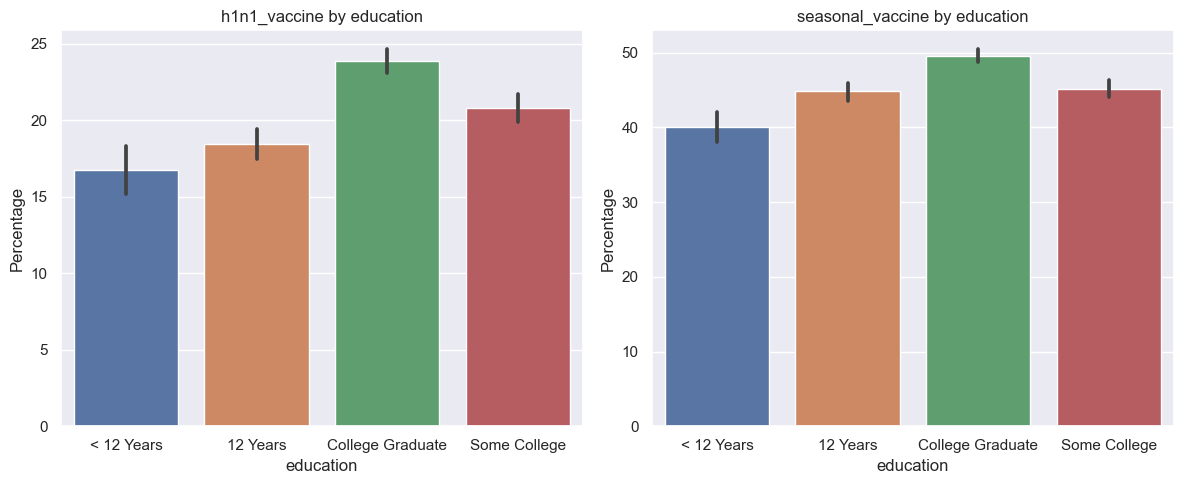

In [24]:
data_visualization.visualize('education', 'h1n1_vaccine', 'seasonal_vaccine')

**Observations** college graduates seem to the majority taking the vaccines ,therefore these means the higher the education level the more willingly to get vaccinated

**Race VS Vaccines**

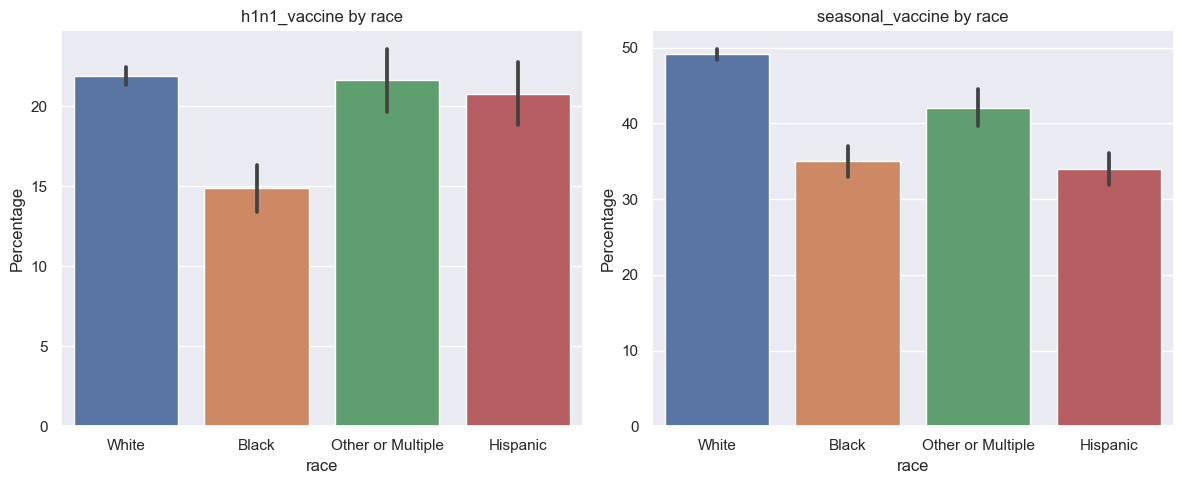

In [25]:
data_visualization.visualize('race', 'h1n1_vaccine', 'seasonal_vaccine')

**Observations** majority race taking the vaccines is white. There should be more research done on these

**Marital status vs vaccines**

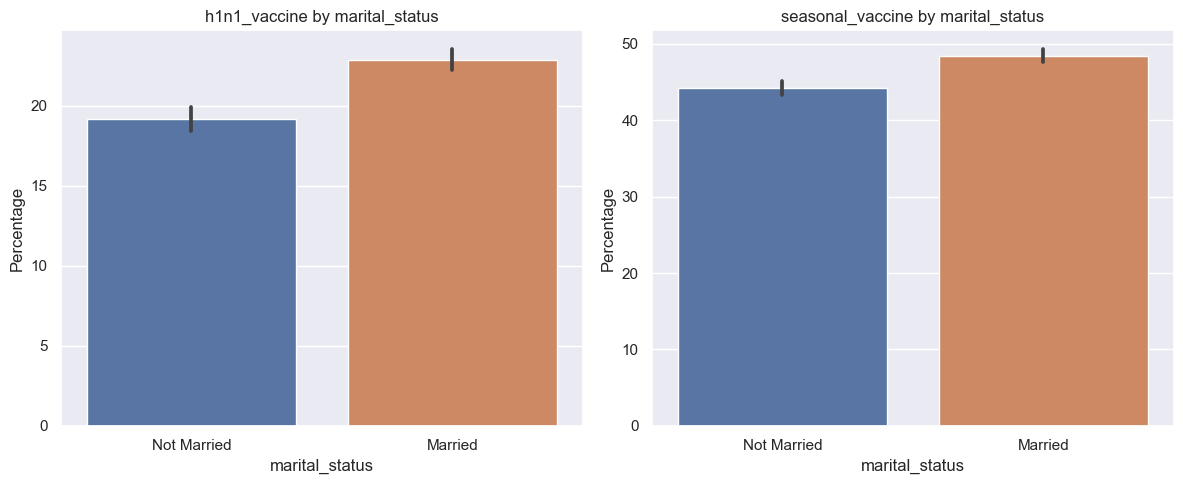

In [26]:
data_visualization.visualize('marital_status', 'h1n1_vaccine', 'seasonal_vaccine')

**Observations** many of the vaccine takers are married

**Income level vs Vaccines**

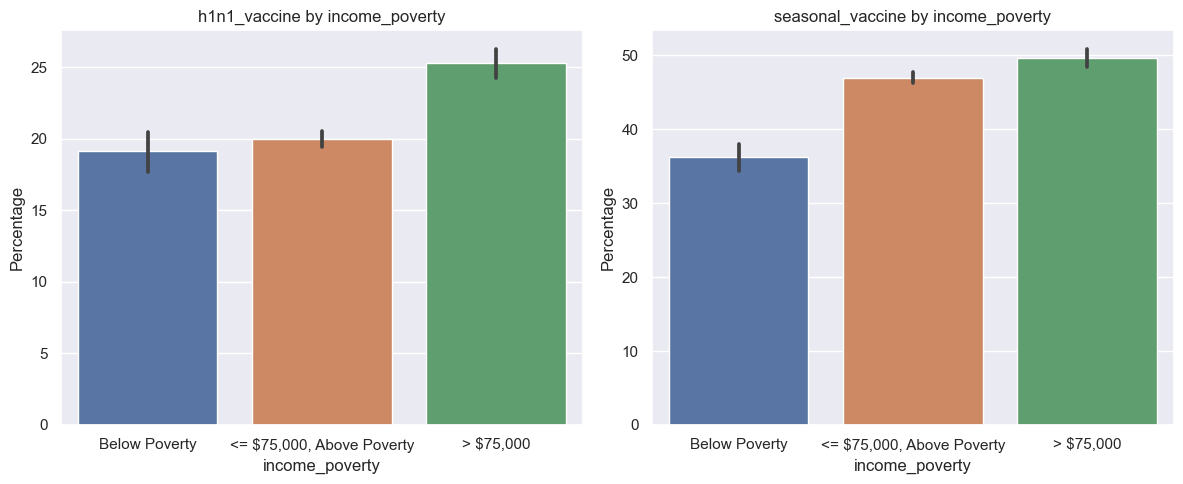

In [27]:
data_visualization.visualize('income_poverty', 'h1n1_vaccine', 'seasonal_vaccine')

**Observations** People earning more than $75000 are likely to get vaccinated

**Census_msa vs vaccines**

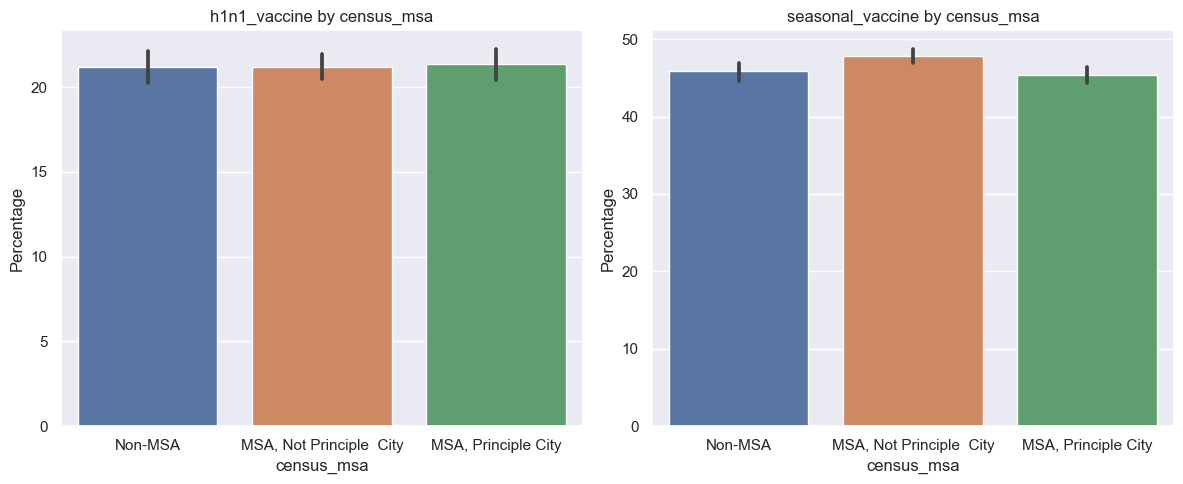

In [28]:
data_visualization.visualize('census_msa', 'h1n1_vaccine', 'seasonal_vaccine')

**Observations** people who are from the MSA Not principle city are the most taking the seasonal vaccine

**Lets check the correlations of our target variables**

In [29]:
clean_vac_df["h1n1_vaccine"].corr (clean_vac_df["seasonal_vaccine"])


0.37714265306144507

The  correlation for these two variables is 0.37, showing a weak positive correlation. These means the majority of persons who received an H1N1 flu vaccine also received a seasonal flu vaccination. 

In [30]:
#lets check for multicolinearity
numeric_cols = clean_vac_df.select_dtypes(include=[ 'int64']).columns
correlation = clean_vac_df[numeric_cols].corr()
print(correlation)


                             respondent_id  h1n1_concern  h1n1_knowledge  \
respondent_id                     1.000000      0.017896        0.003473   
h1n1_concern                      0.017896      1.000000        0.060828   
h1n1_knowledge                    0.003473      0.060828        1.000000   
behavioral_antiviral_meds        -0.008458      0.089866       -0.010450   
behavioral_avoidance              0.008912      0.229648        0.087194   
behavioral_face_mask             -0.006654      0.155757        0.029888   
behavioral_wash_hands             0.011212      0.291670        0.089690   
behavioral_large_gatherings       0.004455      0.254133       -0.047293   
behavioral_outside_home           0.009181      0.245404       -0.066479   
behavioral_touch_face             0.007606      0.245038        0.084633   
doctor_recc_h1n1                 -0.002178      0.136957        0.094135   
doctor_recc_seasonal              0.001131      0.120670        0.074376   
chronic_med_

**Observations**

The correlation between opinion_seas_risk, opinion_seas_vacc_effective, doctor_recc_seasonal, h1n1_vaccine and seasonal_vaccine is 0.386916, 0.358869, 0.360696, and 0.377143 respectively which is relatively high.

Doctor_recc_h1n1, opinion_h1n1_risk, opinion_h1n1_vacc_effective and seasonal vaccine have relatively high correlation with h1n1_vaccine.

We have multicolinearity but since these features are quite important in predicting our target variables we will not drop them rather we will look for methods to mitigate their effects


### MODELLING

**Encoding our categorical variables**
 
 We are going to use label encoding  to encoded our categorical variables since they have a low cardinality


In [31]:
#function for label encoding
def label_encoder(df, categorical_columns=None):
     if categorical_columns is None:
        categorical_columns = [i for i in df.columns if df[i].dtypes == 'object' ]
        le = LabelEncoder()
        for i in categorical_columns:
            df[i + '_encoded'] = le.fit_transform(df[i])
  
            return df

In [32]:
le_vac_df = label_encoder(clean_vac_df)
le_vac_df 

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,age_group_encoded
0,0,1,0,0,0,0,0,0,1,1,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,0,0,3
1,1,3,2,0,1,0,1,0,1,1,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,0,1,1
2,2,1,1,0,1,0,0,0,0,0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,0,0,0
3,3,1,1,0,1,0,1,1,0,0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,0,1,4
4,4,2,1,0,1,0,1,1,0,1,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2,0,0,1,0,0,0,1,0,...,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0,0,0,0,4
26703,26703,1,2,0,1,0,1,0,0,0,...,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1,0,0,0,0
26704,26704,2,2,0,1,1,1,1,0,1,...,Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0,0,0,1,3
26705,26705,1,1,0,0,0,0,0,0,1,...,Married,Rent,Employed,lrircsnp,Non-MSA,1,0,0,0,0


In [33]:
# selecting numeric columns and storing them in num_vac_df for modelling
num_vac_df = le_vac_df.select_dtypes(include=['number'])
num_vac_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,age_group_encoded
0,0,1,0,0,0,0,0,0,1,1,...,1,2,2,1,2,0,0,0,0,3
1,1,3,2,0,1,0,1,0,1,1,...,4,4,4,2,4,0,0,0,1,1
2,2,1,1,0,1,0,0,0,0,0,...,1,1,4,1,2,2,0,0,0,0
3,3,1,1,0,1,0,1,1,0,0,...,3,5,5,4,1,0,0,0,1,4
4,4,2,1,0,1,0,1,1,0,1,...,3,2,3,1,4,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2,0,0,1,0,0,0,1,0,...,1,1,5,2,2,0,0,0,0,4
26703,26703,1,2,0,1,0,1,0,0,0,...,2,2,5,1,1,1,0,0,0,0
26704,26704,2,2,0,1,1,1,1,0,1,...,4,2,5,4,2,0,0,0,1,3
26705,26705,1,1,0,0,0,0,0,0,1,...,1,2,2,1,2,1,0,0,0,0


**Feature selection using chi-square test**

The reasons for using chi_square for feature selection is because of its ease to compute

In [34]:
# lets first split our data into features and target
feature = num_vac_df.drop(['h1n1_vaccine','seasonal_vaccine','respondent_id'], axis=1)
target1 = num_vac_df['h1n1_vaccine']
target2 = num_vac_df['seasonal_vaccine']

In [35]:
# Applying Chi-squared test for h1n1_vaccine
chi2_stats_h1n1, p_values_h1n1 = chi2(feature, target1)
chi2_df_h1n1 = pd.DataFrame({
    'Feature': feature.columns,
    'Chi2 Stat': chi2_stats_h1n1,
    'p-value': p_values_h1n1
})
chi2_df_h1n1 =chi2_df_h1n1.sort_values(by='p-value', ascending=False)
print(f"Chi-squared test results for h1n1_vaccine:{chi2_df_h1n1}")


# Applying Chi-squared test for seasonal_vaccine
chi2_stats_seasonal, p_values_seasonal = chi2(feature, target2)
chi2_df_seasonal = pd.DataFrame({
    'Feature': feature.columns,
    'Chi2 Stat': chi2_stats_seasonal,
    'p-value': p_values_seasonal
})
chi2_df_seasonal = chi2_df_seasonal.sort_values(by='p-value', ascending=False)
print(f"Chi-squared test results for seasonal_vaccine:{chi2_df_seasonal}")




Chi-squared test results for h1n1_vaccine:                        Feature    Chi2 Stat        p-value
21           household_children     0.284434   5.938094e-01
20             household_adults     0.907646   3.407397e-01
19  opinion_seas_sick_from_vacc     1.556451   2.121857e-01
6   behavioral_large_gatherings     5.614840   1.780901e-02
7       behavioral_outside_home     8.641545   3.285826e-03
3          behavioral_avoidance    15.950408   6.502377e-05
5         behavioral_wash_hands    25.856864   3.676949e-07
2     behavioral_antiviral_meds    41.109698   1.439205e-10
8         behavioral_touch_face    43.065378   5.294085e-11
22            age_group_encoded    43.769495   3.694183e-11
12         child_under_6_months   109.342915   1.365047e-25
1                h1n1_knowledge   111.808117   3.936209e-26
16  opinion_h1n1_sick_from_vacc   115.654361   5.657917e-27
4          behavioral_face_mask   123.284462   1.208234e-28
11        chronic_med_condition   172.886102   1.733178e-3

We will now using a alpha of 0,01 because we want our significance level to be reduced because we are dealing with a medical relate data and increase our accuracy for the best results

In [36]:
# Defining a significance level (alpha)
alpha = 0.01 #These is because we are dealing with sensitive medical data hence the low significant level

# Selecting features for h1ni vaccine
selected_features = chi2_df_h1n1[chi2_df_h1n1['p-value'] < alpha]['Feature'].tolist()
selected_features_h1n1 = sorted(selected_features, key=lambda x: chi2_df_h1n1.loc[chi2_df_h1n1['Feature'] == x, 'Chi2 Stat'].values[0], reverse=True)
print(f"Selected features H1N1 vaccine:{selected_features_h1n1}")


# Selecting features for seasonal vaccine
selected_features = chi2_df_seasonal[chi2_df_seasonal['p-value'] < alpha]['Feature'].tolist()
selected_features_seasonal = sorted(selected_features, key=lambda x: chi2_df_seasonal.loc[chi2_df_seasonal['Feature'] == x, 'Chi2 Stat'].values[0], reverse=True)
print(f"Selected features seasonal vaccine:{selected_features_seasonal}")



Selected features H1N1 vaccine:['doctor_recc_h1n1', 'opinion_h1n1_risk', 'opinion_seas_risk', 'doctor_recc_seasonal', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_seas_vacc_effective', 'h1n1_concern', 'chronic_med_condition', 'behavioral_face_mask', 'opinion_h1n1_sick_from_vacc', 'h1n1_knowledge', 'child_under_6_months', 'age_group_encoded', 'behavioral_touch_face', 'behavioral_antiviral_meds', 'behavioral_wash_hands', 'behavioral_avoidance', 'behavioral_outside_home']
Selected features seasonal vaccine:['opinion_seas_risk', 'doctor_recc_seasonal', 'age_group_encoded', 'opinion_seas_vacc_effective', 'opinion_h1n1_risk', 'doctor_recc_h1n1', 'chronic_med_condition', 'household_children', 'health_worker', 'h1n1_concern', 'opinion_h1n1_vacc_effective', 'behavioral_touch_face', 'h1n1_knowledge', 'opinion_seas_sick_from_vacc', 'household_adults', 'behavioral_large_gatherings', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_outside_home', 'behavioral_avoidance', 'opi

After looking at the  chi-square results  we can ascertain that all  features can best predict our target variables

**Splitting our data into train and test**

Lets prepare our data for modelling by splitting it into train and test and also scale it

In [37]:
X = feature
y_h1n1 = target1
y_seas = target2

#split into train and test
X_train,X_test,y_h1n1_train,y_h1n1_test = train_test_split(X,y_h1n1,random_state=42)
X_train,X_test,y_seas_train,y_seas_test = train_test_split(X,y_seas,random_state=42)

In [38]:
#scaling our data
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We are using standard scaler since we require our features to be centered at zero 

**Model 1:Decision tree (Basic)**

In [39]:
# fitting the model for h1n1
dec_model = DecisionTreeClassifier(random_state=1)
dec_model.fit(X_train_scaled,y_h1n1_train)
dec_pred = dec_model.predict(X_test_scaled)
# fitting the model for seasonal
dec_model.fit(X_train_scaled,y_seas_train)
dec_pred = dec_model.predict(X_test_scaled)

# classification metrics
print(f'Accuracy score:h1n1 {accuracy_score(y_h1n1_test, dec_pred)}, seasonal {accuracy_score(y_seas_test, dec_pred)}')
print(f'ROC score:h1n1 {roc_auc_score(y_h1n1_test,dec_pred)}, seasonal {roc_auc_score(y_seas_test,dec_pred)}')

print(f'Total ROC score: {((roc_auc_score(y_h1n1_test, dec_pred) + roc_auc_score(y_seas_test, dec_pred))/2)}')

dec_roc = ((roc_auc_score(y_h1n1_test, dec_pred) + roc_auc_score(y_seas_test, dec_pred))/2)

Accuracy score:h1n1 0.5893365283810095, seasonal 0.6768009585143029
ROC score:h1n1 0.6047814291962617, seasonal 0.6752108513978056
Total ROC score: 0.6399961402970336


Our decision tree model has an accuracy score of 0.59 on hin1 vaccine and 0.68 on seasonal vaccine which means it can only predict 6 out of 10 [0, 1] correctly on the h1n1 vaccine while about 7 out of 10 on the seasonal vaccine

**Model 2:logistic regression**
    
lets check for class imbalances in our target variable and fix it    

In [40]:
print(y_h1n1.value_counts())
print(y_seas.value_counts())

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64
seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64


We will correct the class imbalance with SMOTE technique

In [41]:
# Using smote on h1n1 vaccine class
smote = SMOTE()
X = X_train_scaled
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_h1n1_train)

print(y_train_resampled.value_counts())

h1n1_vaccine
0    15773
1    15773
Name: count, dtype: int64


We have solved our class imbalance in the h1n1 class, in our model we will  use 'l1' regularization to mitigate multicolinearity 

In [42]:
#fitting the model
#fitting the h1n1 class
log_model = LogisticRegression(max_iter=5000, random_state=42,penalty='l1', C=0.01, solver='saga')
log_model.fit(X_train_resampled, y_train_resampled)
log_pred = log_model.predict_proba(X_test_scaled)
log_predicted = (log_pred[:, 1] >= 0.5).astype(int)
print(f'h1n1 Logistic Regression accuracy score:{accuracy_score(y_h1n1_test, log_predicted)}')
print(f'h1n1 Logistic Regression ROC AUC score:{roc_auc_score(y_h1n1_test, log_predicted)}')
#seasonal class
log_model.fit(X_train_scaled, y_seas_train)
log_pred = log_model.predict_proba(X_test_scaled)
log_predicted = (log_pred[:, 1] >= 0.5).astype(int)
print(f'seasonal Logistic Regression accuracy score:{accuracy_score(y_seas_test, log_predicted)}')
print(f'seasonal Logistic Regression ROC AUC score:{roc_auc_score(y_seas_test, log_predicted)}')

print(f'Total ROC score: {((roc_auc_score(y_h1n1_test, log_predicted) + roc_auc_score(y_seas_test, log_predicted))/2)}')

log_roc = ((roc_auc_score(y_h1n1_test, log_predicted) + roc_auc_score(y_seas_test, log_predicted))/2)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


h1n1 Logistic Regression accuracy score:0.8157855324247416
h1n1 Logistic Regression ROC AUC score:0.6363641791285075
seasonal Logistic Regression accuracy score:0.7841845140032949
seasonal Logistic Regression ROC AUC score:0.7809705539622772
Total ROC score: 0.7204812050249091


The model seems to be performing much better in the seasonal vaccine class than the h1n1 vaccine class it can predict about 8 out of 10 of the seasonal vaccine class and about 7 out of 10 in the h1n1 vaccine class  

**Model 3:KNN**

In [43]:
#Fitting the model
#fitting the h1n1 class
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_scaled,y_h1n1_train)
knn_pred = knn_model.predict(X_test_scaled)

#seasonal class
knn_model.fit(X_train_scaled,y_seas_train)
knn_pred = knn_model.predict(X_test_scaled)

print(f'Accuracy score:h1n1 {accuracy_score(y_h1n1_test, knn_pred)}, seasonal {accuracy_score(y_seas_test, knn_pred)}')
print(f'ROC AUC score:h1n1 {roc_auc_score(y_h1n1_test,knn_pred)}, seasonal {roc_auc_score(y_seas_test,knn_pred)}')

print(f'Total ROC score: {((roc_auc_score(y_h1n1_test, knn_pred) + roc_auc_score(y_seas_test, knn_pred))/2)}')

knn_roc = ((roc_auc_score(y_h1n1_test, knn_pred) + roc_auc_score(y_seas_test, knn_pred))/2)

Accuracy score:h1n1 0.6267784933353302, seasonal 0.7103489591133743
ROC AUC score:h1n1 0.6453027603435738, seasonal 0.7074204336992558
Total ROC score: 0.6763615970214147


These model performance is slightly lower than the logistic regression model  it can predict 6 out of 10 in the h1n1 class and 7 out of 10 in the seasonal class

**Model 4: Naive Bayes**

In [44]:
#fitting our model
#h1n1 class
naive_model = GaussianNB()
naive_model.fit(X_train_scaled, y_h1n1_train)
naive_pred = naive_model.predict(X_test_scaled)

#seasonal class
naive_model.fit(X_train_scaled, y_seas_train)
naive_pred = naive_model.predict(X_test_scaled)

print(f'Accuracy score:h1n1 {accuracy_score(y_h1n1_test, naive_pred)}, seasonal {accuracy_score(y_seas_test, naive_pred)}')
print(f'ROC AUC score:h1n1 {roc_auc_score(y_h1n1_test,naive_pred)}, seasonal {roc_auc_score(y_seas_test,naive_pred)}')

print(f'Total ROC score: {((roc_auc_score(y_h1n1_test, naive_pred) + roc_auc_score(y_seas_test, naive_pred))/2)}')

naive_roc = ((roc_auc_score(y_h1n1_test, naive_pred) + roc_auc_score(y_seas_test, naive_pred))/2)

Accuracy score:h1n1 0.6466976186910289, seasonal 0.7377564774599371
ROC AUC score:h1n1 0.6860456676264051, seasonal 0.7361800615684454
Total ROC score: 0.7111128645974252


These model performance is better than the knn model it can predict 6 out of 10  in the h1n1 class and 7 in the seasonal class accurately

**Model 5: Random forest**

In [45]:
#fitting the model
#h1n1
random_model = RandomForestClassifier(random_state=1) 
random_model.fit(X_train_scaled, y_h1n1_train)
random_pred = random_model.predict_proba(X_test_scaled)
random_predicted = (random_pred[:, 1] >= 0.5).astype(int)
#seasonal
random_model = RandomForestClassifier(random_state=1) 
random_model.fit(X_train_scaled, y_seas_train)
random_pred = random_model.predict_proba(X_test_scaled)
random_predicted = (random_pred[:, 1] >= 0.5).astype(int)


print(f'h1n1 Random Forest Accuracy score:{accuracy_score(y_h1n1_test, random_predicted)}')
print(f'h1n1 Random Forest ROC AUC score:{roc_auc_score(y_h1n1_test, random_predicted)}')

print(f'seasonal Random Forest Accuracy score:{accuracy_score(y_seas_test, random_predicted)}')
print(f'seasonal Random Forest ROC AUC score:{roc_auc_score(y_seas_test, random_predicted)}')

print(f'Total ROC score: {((roc_auc_score(y_h1n1_test, random_predicted) + roc_auc_score(y_seas_test, random_predicted))/2)}')

random_roc = ((roc_auc_score(y_h1n1_test, random_predicted) + roc_auc_score(y_seas_test, random_predicted))/2)

h1n1 Random Forest Accuracy score:0.6287254755129549
h1n1 Random Forest ROC AUC score:0.6542725352925234
seasonal Random Forest Accuracy score:0.768908192301932
seasonal Random Forest ROC AUC score:0.7670700422905516
Total ROC score: 0.7106712887915375


Model performance slightly lower to the naive model

**Model Tuning**

We are going to choose the KNN model and tune it to see if its performance will improve using gridsearchcv since it’s the lowest performing model and has almost a balanced prediction on both classes

In [49]:
# Applying girdsearch on the knn model
#h1n1
gs_h1n1 = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={'n_neighbors': range(1, 100),
                              'weights': ['uniform', 'distance'],
                              'p': range(1, 2)  }, cv=5, scoring = 'roc_auc', n_jobs = -1)

gs_h1n1.fit(X_train_scaled,y_h1n1_train)


#seasonal
gs_seas = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={'n_neighbors': range(1, 100),
                              'weights': ['uniform', 'distance'],
                              'p': range(1, 2) },  cv=5, scoring = 'roc_auc', n_jobs = -1 )

gs_seas.fit(X_train_scaled,y_seas_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100), 'p': range(1, 2),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [50]:
#Finding best hyperparameters
best_params_h1n1 = gs_h1n1.best_params_
print(f"Best parameters h1n1 found: {best_params_h1n1}")

best_params_seasonal = gs_seas.best_params_
print(f"Best parameters seasonal found: {best_params_seasonal}")


Best parameters h1n1 found: {'n_neighbors': 99, 'p': 1, 'weights': 'uniform'}
Best parameters seasonal found: {'n_neighbors': 97, 'p': 1, 'weights': 'uniform'}


In [51]:
#fitting the tuned model
#H1N1
best_h1n1 = gs_h1n1.best_estimator_
best_h1n1.fit(X_train_scaled,y_h1n1_train)
best_h1n1_pred = best_h1n1.predict(X_test_scaled)
#seasonal
best_seas = gs_seas.best_estimator_
best_seas.fit(X_train_scaled,y_seas_train)
best_seas_pred = best_seas.predict(X_test_scaled)

print(f'Accuracy score:h1n1 {accuracy_score(y_h1n1_test, best_h1n1_pred)}, seasonal {accuracy_score(y_seas_test, best_seas_pred)}')
print(f'ROC AUC score:h1n1 {roc_auc_score(y_h1n1_test,best_h1n1_pred)}, seasonal {roc_auc_score(y_seas_test,best_seas_pred)}')

print(f'Total ROC score: {((roc_auc_score(y_h1n1_test, best_h1n1_pred) + roc_auc_score(y_seas_test, best_seas_pred))/2)}')


Accuracy score:h1n1 0.8316609255653736, seasonal 0.7760970495731616
ROC AUC score:h1n1 0.6515962470919391, seasonal 0.7716434553639623
Total ROC score: 0.7116198512279507


**Evaluation**

**Classfication metric used and why ?** 

AUC measures the model specificity and sensitivity hence it measures the model ability to distinguish between postive and negative in imbbalanced data while accuracy score is easy to understand and interprate.


|MODEL	           |ACCURACY H1N1	|ACCURACY SEASONAL|	AUC H1N1 |AUC SEASONAL|
|------------------|----------------|-----------------|----------|------------|
|Decision tree     |	0.59        |  0.67	          |0.6	     |0.68        |
|Logisticregression|	0.82        |    	0.78	  |0.64	     |0.78        |
|KNN	           |    0.63        | 	0.71	      |0.64	     |0.71        |
|Naïve Bayes	   |    0.65        |	0.74	      |0.69	     |0.74        |
|Random Forest     |	0.63	    |0.77	          |0.65	     |0.78        |
|Tuned KNN	       |	0.83	    |0.78             |0.65	     |0.77        |

**Models choosen and their observations**

With an AUC score of 0.65 and  an accuracy of 0.83, the Tuned KNN model is the best  model for predicting the "h1n1" class while  the logistic regression model is the best option for predicting the "seasonal" class because it has an accuracy of 0.78 and AUC score of 0.78, 



**Discussion**

The tuned KNN model is best for predicting the h1n1 vaccine because it has an accuracy of 83% which means it can predict 8 out of 10 values  these is a boost from the initial model which had an accuracy score of 62 %.The tuning help the model find its best parameters for optimum performance. The AUC score is relatively low at 65 % which means the model may struggle to accurately distinguish between positive and negative cases which can lead to a higher rate of false positives and false negatives. 

The logistic regression model is best for predicting the seasonal vaccine it has an AUC score of 78 % and 78 % accuracy score meaning it has a better discrimination ability of positives and negatives ,it can also accurately predict 7  out of 10 values.
I experimented with several penalty until I finally choose 'l1' since it gave me the best performance and also help in regularizing the multicolinearities



**CONCLUSIONS**

 Majority of the respondents have been vaccinated with seasonal vaccine more than h1n1 vaccine

Majority of the respondents who have been vaccinated are of female gender

Majority of the respondents who have been vaccinated are 55 year old and above

Majority of the respondents who have been vaccinated have a higher education level most of them had graduated from college

Majority of the respondents who have been vaccinated are of white race

Majority of the respondents who have been vaccinated are married

Majority of the respondents who have been vaccinated earn more than $75000 a year

Majority of persons who received an H1N1 flu vaccine also received a seasonal flu vaccination because they have a weak correlation

All feature except 'respondent id' were good at predicting the target variables

The tuned knn model is the best model for predicting the h1n1_vaccine and logistic regression for seasonal vaccine 



**RECOMMEDATIONS**

. Targeted Vaccination programs: creating vaccination programs that targets the groups such as females, people aged 55 and over,   higher education students and high income earners..

. Addressing Racial discrepancies: While most of the vaccinated respondents were  white, other racial groups should be also        monitored to prevent or stop any racial discrepanicies through public education and awareness campaigns and vaccination         drives that target at all the ethnic groups to ensure those of color get equal access to the vaccines.

. Targeted Messaging: the various means of communication and the strategies used in the dissemination of information must stress   on the importance of taking both vaccines .

. Model Selection and Deployment: In order to provide an accurate prediction of H1N1 vaccine, the Tuned KNN model should  be       used and the logistic regression model should be used to predict the seasonal vaccine ,all models described above, one should   be constantly evaluated and monitored for maximum efficiency 

. Vaccine Awareness: there’s need to embark on campaigns to educate people with high risks of contracting the diseases to take     the two vaccines. 

.
